# Training a simple Convolutional Neural Network on the MNIST database


In this tutorial you will learn how to create your first neural network model in Python using Keras.

The steps you are going to cover in this tutorial are as follows:

1. Load Data
2. Define Model
3. Compile Model
4. Fit Model
5. Evaluate Model

## 1. Load data

We are going to use the **MNIST** database as training set. The MNIST is a large database of handwritten digits which  commonly used for training and testing in the field of machine learning. Example of images:

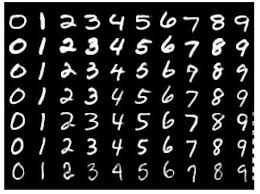

In [65]:
from IPython.display import Image
Image(filename='mnist_example.jpg') 

Importing the necessary libraries

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


Setting the constants

In [2]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

Loading and preparing the training and test images: 


In [3]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print x_train.shape

(60000, 28, 28)


5


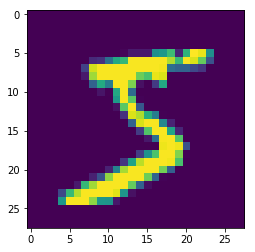

In [7]:
from matplotlib import pyplot as plt
plt.imshow(x_train[0])
plt.show()

## Looking at the average of images in MNIST

In [67]:
import numpy as np
import os
def get_avg_mnist(x_train, y_train):
    # takes an average over all images corresondeing to the same category (e.g. all 1's)
    # and stores the output images in a directory
    
    no_samples = x_train.shape[0]

    for i in range(10):
        a = x_train[(y_train == i )]
        avg_img = np.mean(a, axis=0)
        plt.imshow(avg_img)
        #plt.show()
        plt.savefig(os.path.join(os.getcwd(), 'figs', str(i)))

#get_avg_mnist(x_train, y_train)

/Users/sahar/Documents/Courses&Books/DeepLearning/figs/9


## 2. Preprocessing data

In [71]:
# Reshaping the dataset for this backend: we must explicitly declare a dimension for the depth of the input image. 
# For example, a full-color image with all 3 RGB channels will have a depth of 3.
# Our MNIST images only have a depth of 1, but we must explicitly declare that.

print K.image_data_format()
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    

channels_last


In [72]:
print x_train.shape
print input_shape

(60000, 28, 28, 1)
(28, 28, 1)


In [73]:
# convert our data type to float32 and normalize our data values to the range [0, 1].
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [74]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

('x_train shape:', (60000, 28, 28, 1))
(60000, 'train samples')
(10000, 'test samples')


## 3. Preprocessing class label for Keras

In [75]:
print y_train.shape
print y_train[:5]

(60000,)
[5 0 4 1 9]


The y_train and y_test data must be splited into 10 distinct class labels:

In [76]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [77]:
print y_train.shape
print y_train[:5]

(60000, 10)
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


## 4. Define model architecture

Models in Keras are defined as a sequence of layers.

We create a Sequential model and add layers one at a time until we are happy with our network topology.

In [78]:
model = Sequential()

Adding input layer:

Conv2d(the number of convolution filters to use, the number of rows in each convolution kernel, and the number of columns in each convolution kernel)

input_shape: the shape of 1 sample: (depth, width, height) of each digit image

In [79]:
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

In [80]:
print input_shape

print model.output_shape

(28, 28, 1)
(None, 26, 26, 32)


Next, we can simply add more layers to our model like we're building legos

Dropout layer: for regularizing our model in order to prevent overfitting. 

MaxPooling2D: a way to reduce the number of parameters in our model by sliding a 2x2 pooling filter across the previous layer and taking the max of the 4 values in the 2x2 filter.



In [81]:
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

Adding fully connected dense layers:

Flatten: the weights from the Convolution layers must be flattened (made 1-dimensional) before passing them to the fully connected Dense layer.
Dense layers: the first parameter is the output size of the layer.

In [82]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

Output layer

In [83]:
model.add(Dense(num_classes, activation='softmax'))

## 5. Compile model

Defining the loss function and the optimizer

In [84]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

## 6. Fit model on training data

In [7]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 258s - loss: 0.3179 - acc: 0.9061 - val_loss: 0.0760 - val_acc: 0.9762
Epoch 2/12
60000/60000 [==============================] - 267s - loss: 0.1114 - acc: 0.9668 - val_loss: 0.0560 - val_acc: 0.9829
Epoch 3/12
60000/60000 [==============================] - 282s - loss: 0.0864 - acc: 0.9746 - val_loss: 0.0458 - val_acc: 0.9859
Epoch 4/12
60000/60000 [==============================] - 215s - loss: 0.0700 - acc: 0.9794 - val_loss: 0.0416 - val_acc: 0.9862
Epoch 5/12
60000/60000 [==============================] - 223s - loss: 0.0619 - acc: 0.9816 - val_loss: 0.0371 - val_acc: 0.9873
Epoch 6/12
60000/60000 [==============================] - 225s - loss: 0.0549 - acc: 0.9836 - val_loss: 0.0357 - val_acc: 0.9891
Epoch 7/12
60000/60000 [==============================] - 228s - loss: 0.0498 - acc: 0.9850 - val_loss: 0.0328 - val_acc: 0.9891
Epoch 8/12
60000/60000 [=======================

## 7. Evaluate model on test data

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

('Test loss:', 0.029036190410514973)
('Test accuracy:', 0.99009999999999998)
